Student Perfomance Indicator

Life cycle of Machine Learnig Project

- Understanding the problem Statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis(EDA)
- Data Pre-processing
- Model Training
- Choose best model

1) Problem Statement

- This project understands how the student's performance (test score) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data collection

- Dataset Source - https//www.kaggle.com/datasets/spscientists/students-performance-in-exams?datasetId=74977
- The dataset consist of 8 columns and 1000 rows




2.1 Import Data Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame


In [4]:
df= pd.read_csv("C:\\projects\\mlproject\\notebook\\data\\StudentsPerformance.csv")


In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

2.2 Dataset Information

- Gender: sex of students -> (Male/female)
- race/ethnicity: ethnicity of students -> (Group A, B , C, D, E)
- Parental level of education: parents' final education(Bachelor's degree, some college, master's degree, associate's degree, high school )
- lunch: having lunch before test(standard or free/reduced)
- Test preparatioin course: Completer or not completer before test.
- math score
- Reading score
- Writing score


3. Data Checks to perform

- Check Missing Values
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics 
- Check various categories present in the different categorical column

In [9]:
# 3.1 checking missing values

df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
# 3.2 check duplicates
df.duplicated().sum()


np.int64(0)

In [11]:
# check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
#checking number of uniques values
df.nunique(dropna=False)


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [18]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

- From the above description of numerical data, all means are very close to each other - between 66 and 68.05
- All standard deviations are also close - between 14.6 and 15.19
- While there's a minimum score 0 for math, for writing minimum is higher and for reading yet higher = 17

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3.7 Exploring DATA

In [20]:
print("Categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:   ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:   ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())


print("Categories in 'test preparation course' variable:   ",end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:     ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [22]:
# define numerical and categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features= [feature for feature in df.columns if df[feature].dtype=='O']

print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical_features: {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical_features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.8 Adding columns for "Total Score" and " Average"

In [25]:
df['Total Score']= df['math score']+df['reading score']+ df['writing score']
df['Average']= df['Total Score']/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [ ]:
reading_full= df[df['reading score']==100] ['Average'].count()
writing_full= df[df['writing score']==100 ]['Average'].count()
math_full= df[df['math score']== 100]['Average'].count()

print(f'Number of columns with full marks in Math:{math_full}')
print(f'Number of columns with full marks in reading:{reading_full}')
print(f'Number of columns with full marks in writing:{writing_full}')

Number of columns with full marks in Math:7
Number of columns with full marks in reading:17
Number of columns with full marks in writing:14


In [33]:
reading_full= df[df['reading score']<=20] ['Average'].count()
writing_full= df[df['writing score']<=20 ]['Average'].count()
math_full= df[df['math score']<= 20]['Average'].count()

print(f'Number of columns with 20 marks in Math:{math_full}')
print(f'Number of columns with 20 marks in reading:{reading_full}')
print(f'Number of columns with 20 marks in writing:{writing_full}')

Number of columns with 20 marks in Math:4
Number of columns with 20 marks in reading:1
Number of columns with 20 marks in writing:3


4. Exploring Data (Visualization)

4.1 Visualize average score distibution to make some conclusion.
 - Histogram
 - Kernel Distribution Function (KDE)

<Figure size 640x480 with 0 Axes>

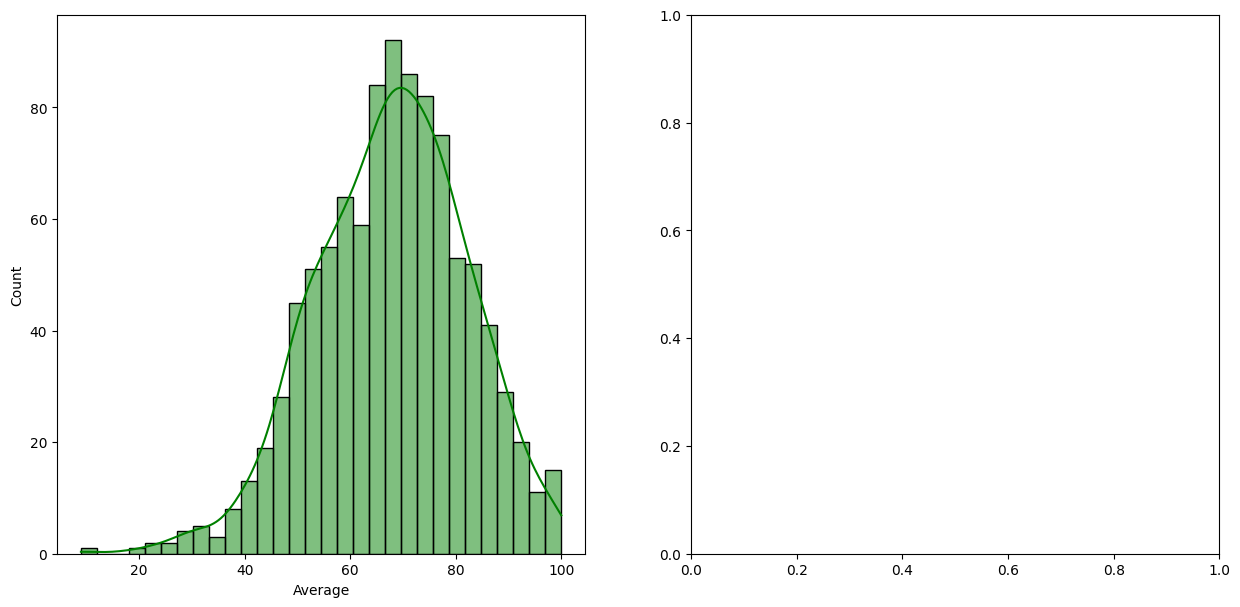

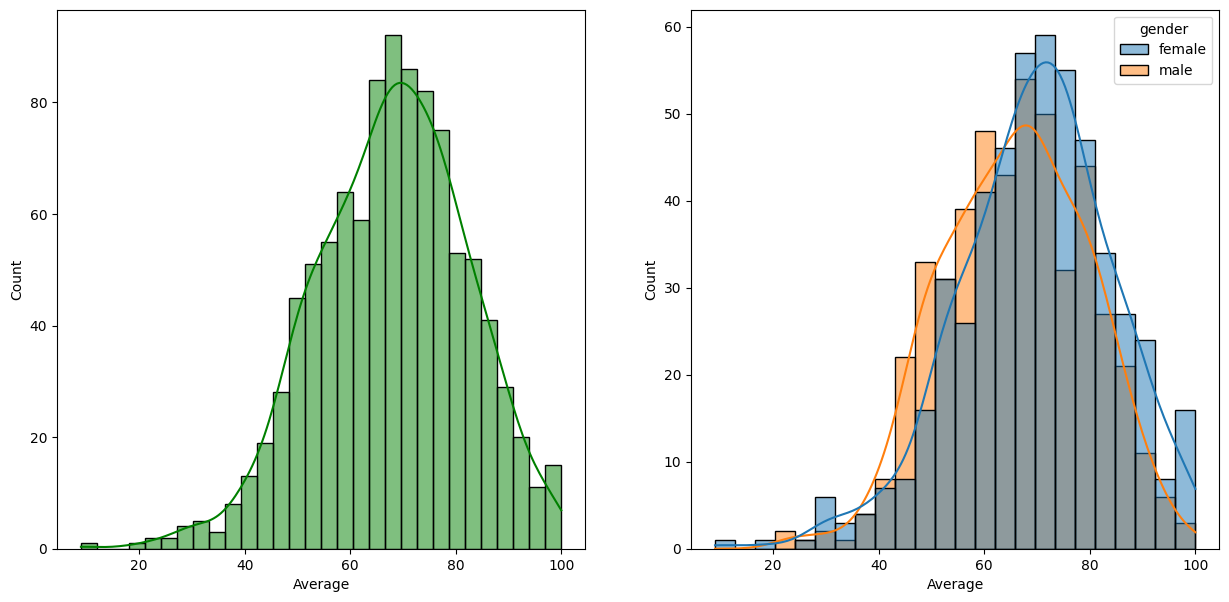

In [39]:
# Histogram and KDE 
fig, axs= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x= 'Average', bins= 30, kde= True,color='g')
plt.subplot(122)
sns.histplot(data=df, x= 'Average', kde=True,hue='gender')
plt.show()

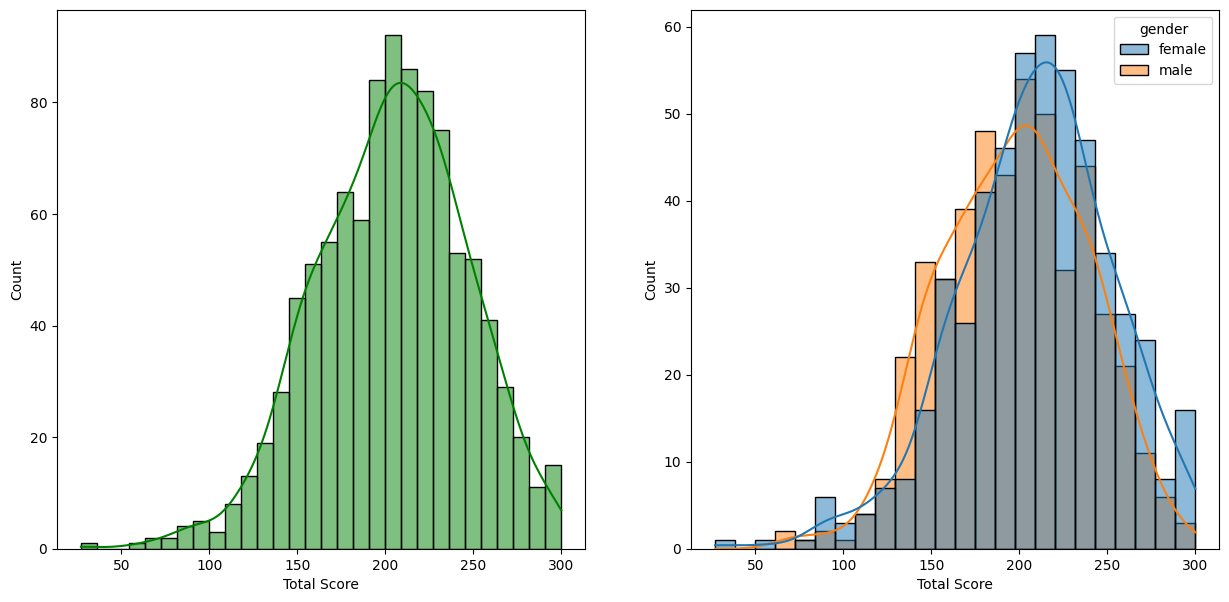

In [40]:
fig, axs= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x= 'Total Score', bins= 30, kde= True,color='g')
plt.subplot(122)
sns.histplot(data=df, x= 'Total Score', kde=True,hue='gender')
plt.show()

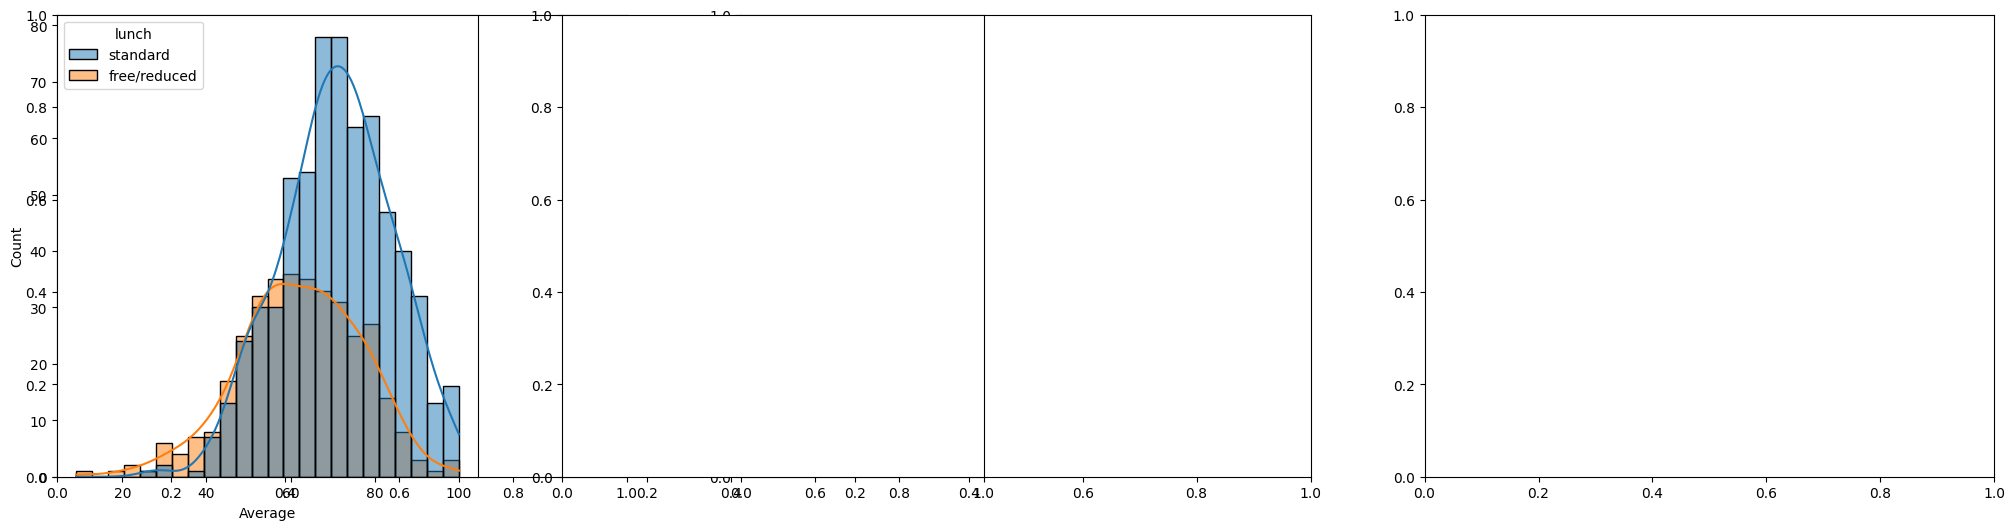

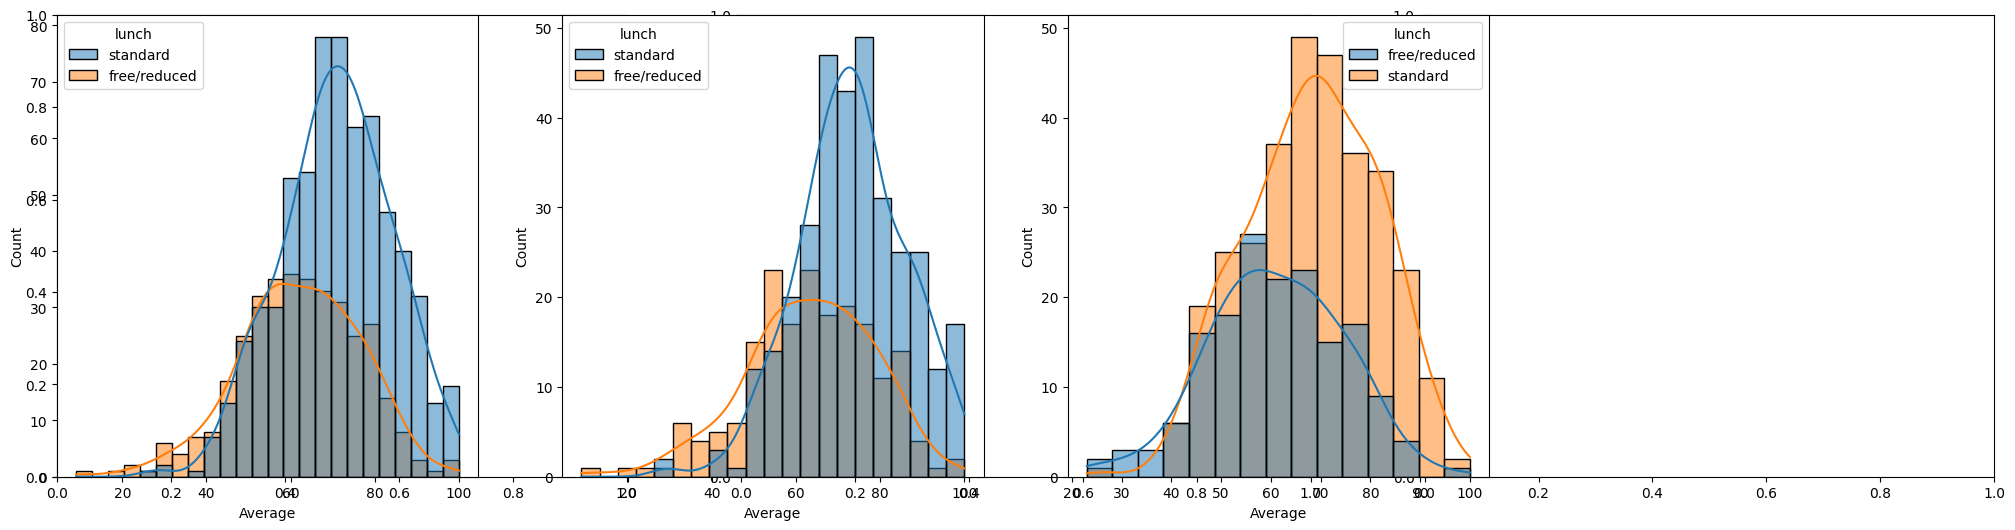

In [42]:
fig, axs= plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x= 'Average', kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x= 'Average', kde=True,hue='lunch')
plt.show()

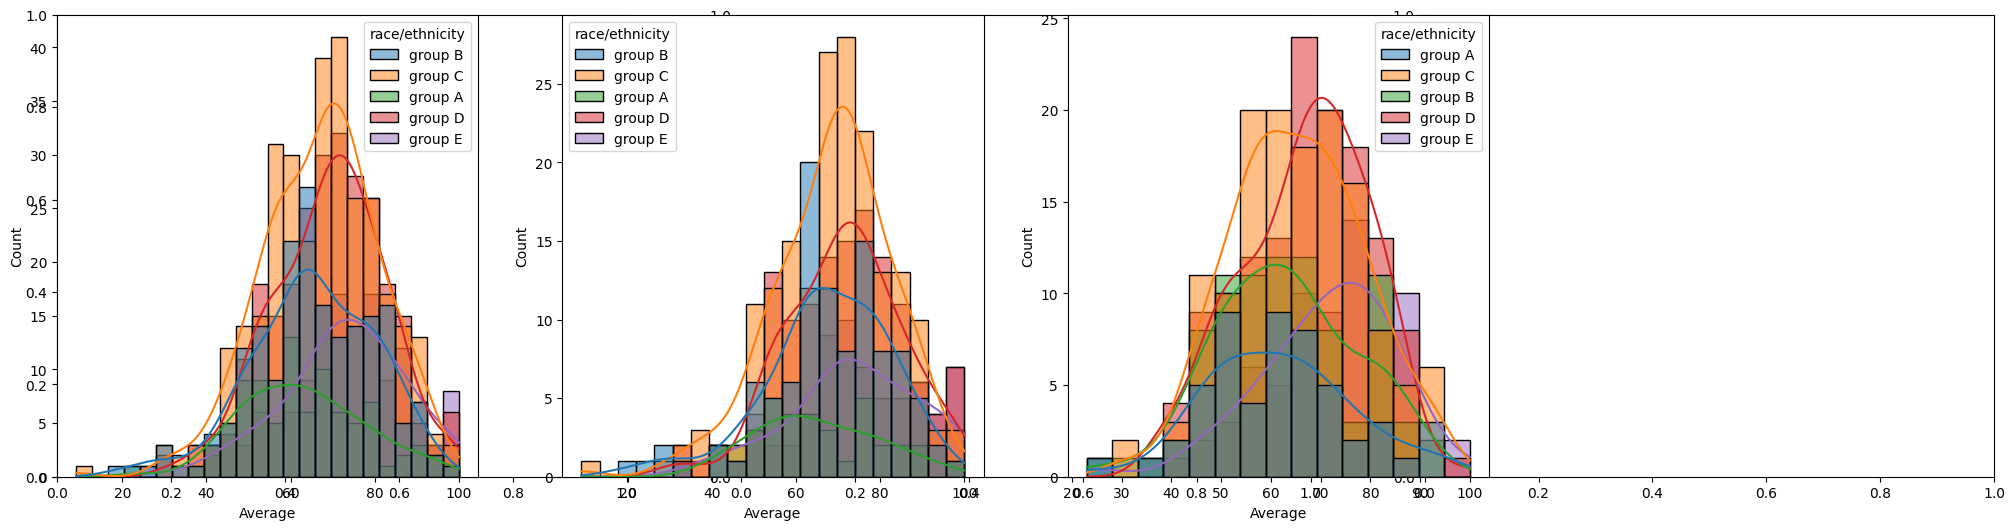

In [43]:
fig, axs= plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x= 'Average', kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x= 'Average', kde=True,hue='race/ethnicity')
plt.show()

In [46]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH_SCORES')
plt.violinplot(y='math score',data=df,color= 'red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
plt.violinplot(y='Reading score',data=df,color= 'green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
plt.violinplot(y='writing score',data=df,color= 'blue',linewidth=3)
plt.show()

TypeError: violinplot() got an unexpected keyword argument 'y'

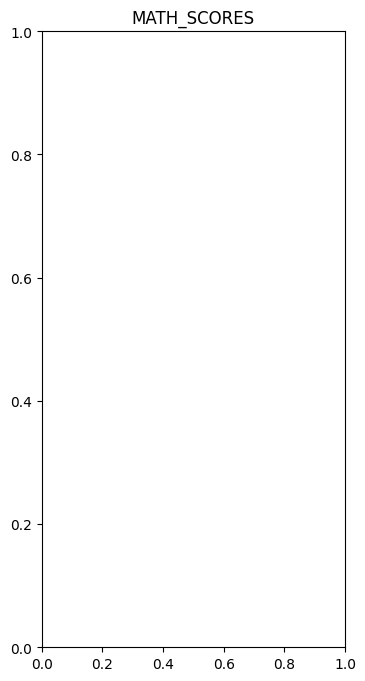

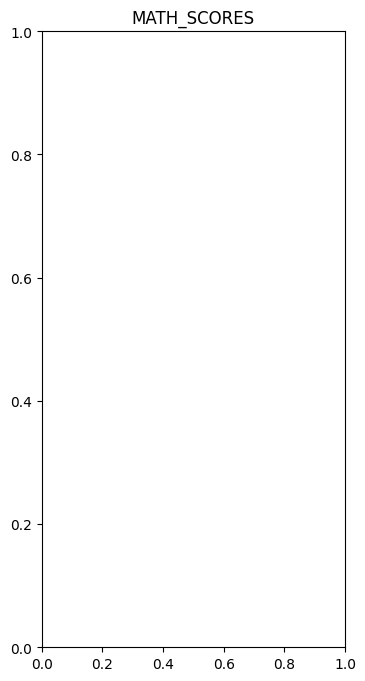

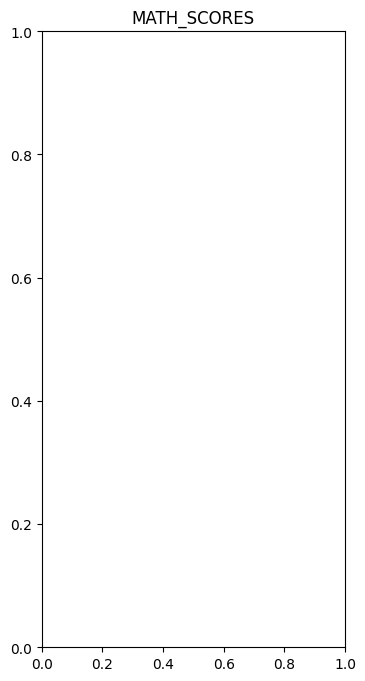

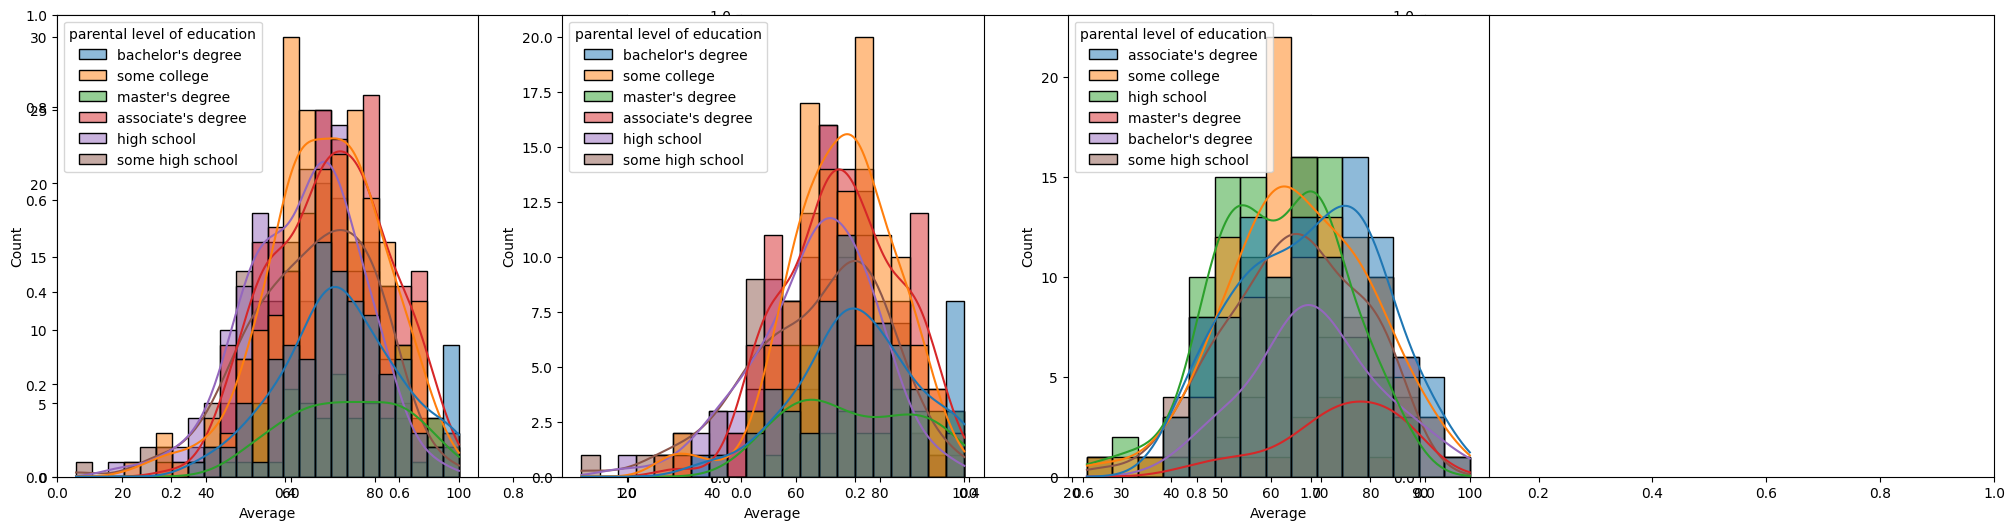

In [47]:
fig, axs= plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x= 'Average', kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x= 'Average', kde=True,hue='parental level of education')
plt.show()

Multivariate analysis using pieplot


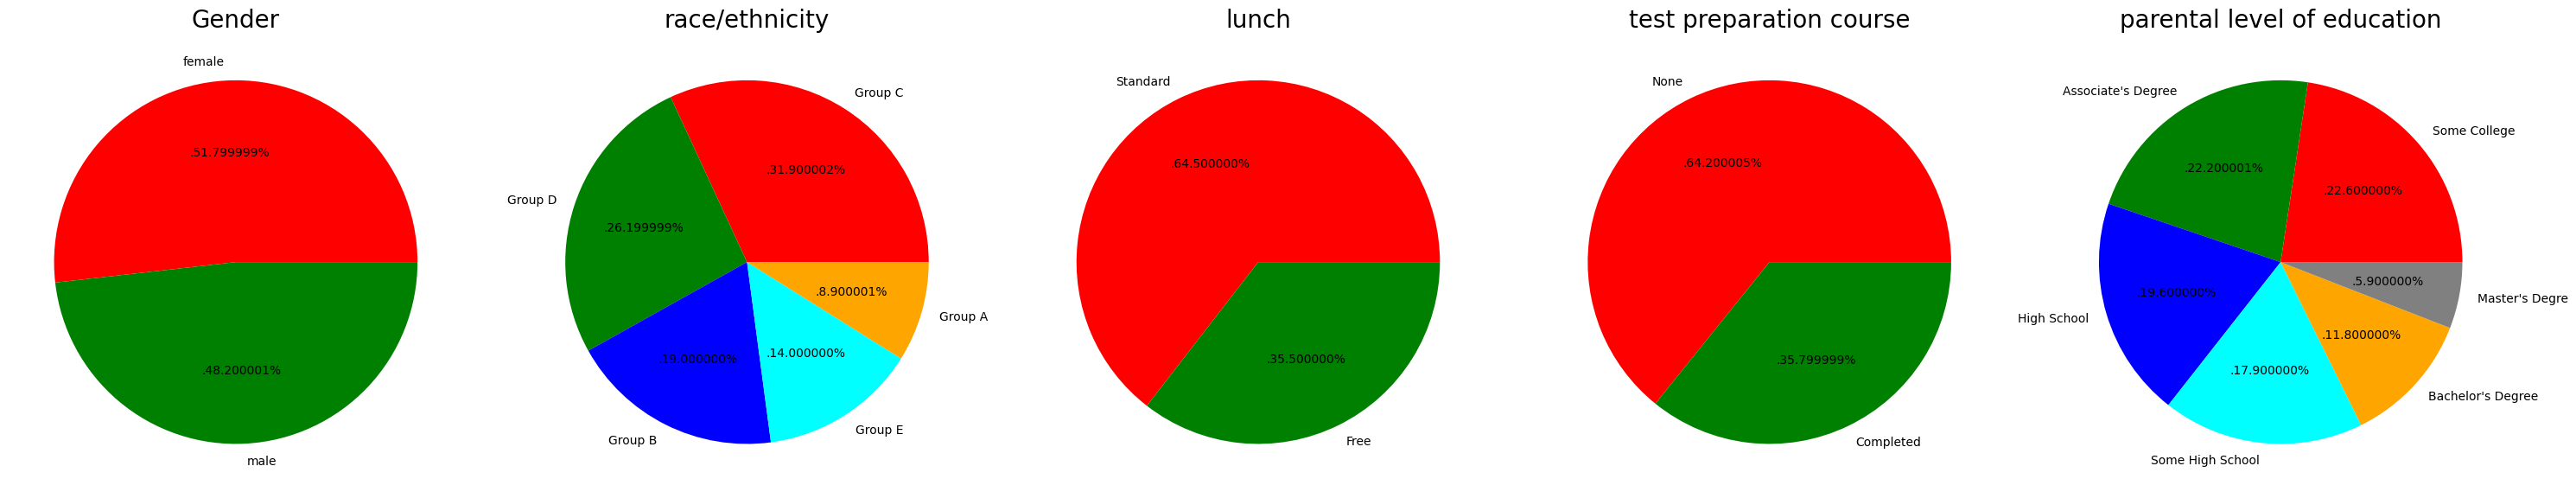

In [51]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size= df['gender'].value_counts()
labels='female','male'
color= ['red','green']

plt.pie(size,colors= color,labels= labels,autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off') 

plt.subplot(1,5,2)
size= df['race/ethnicity'].value_counts()
labels= 'Group C','Group D','Group B','Group E','Group A'
color= ['red','green','blue','cyan','orange']

plt.pie(size,colors= color,labels= labels,autopct='.%2f%%')
plt.title('race/ethnicity', fontsize=20)
plt.axis('off') 



plt.subplot(1,5,3)
size= df['lunch'].value_counts()
labels= 'Standard', 'Free'
color= ['red','green']

plt.pie(size,colors= color,labels= labels,autopct='.%2f%%')
plt.title('lunch', fontsize=20)
plt.axis('off') 

plt.subplot(1,5,4)
size= df['test preparation course'].value_counts()
labels= 'None', 'Completed'
color= ['red','green']

plt.pie(size,colors= color,labels= labels,autopct='.%2f%%')
plt.title('test preparation course', fontsize=20)
plt.axis('off') 


plt.subplot(1,5,5)
size= df['parental level of education'].value_counts()
labels= 'Some College', "Associate's Degree","High School", "Some High School", "Bachelor's Degree", "Master's Degre"
color= ['red','green','blue','cyan','orange','grey']

plt.pie(size,colors= color,labels= labels,autopct='.%2f%%')
plt.title('parental level of education', fontsize=20)
plt.axis('off') 


plt.tight_layout()
plt.grid()

plt.show()

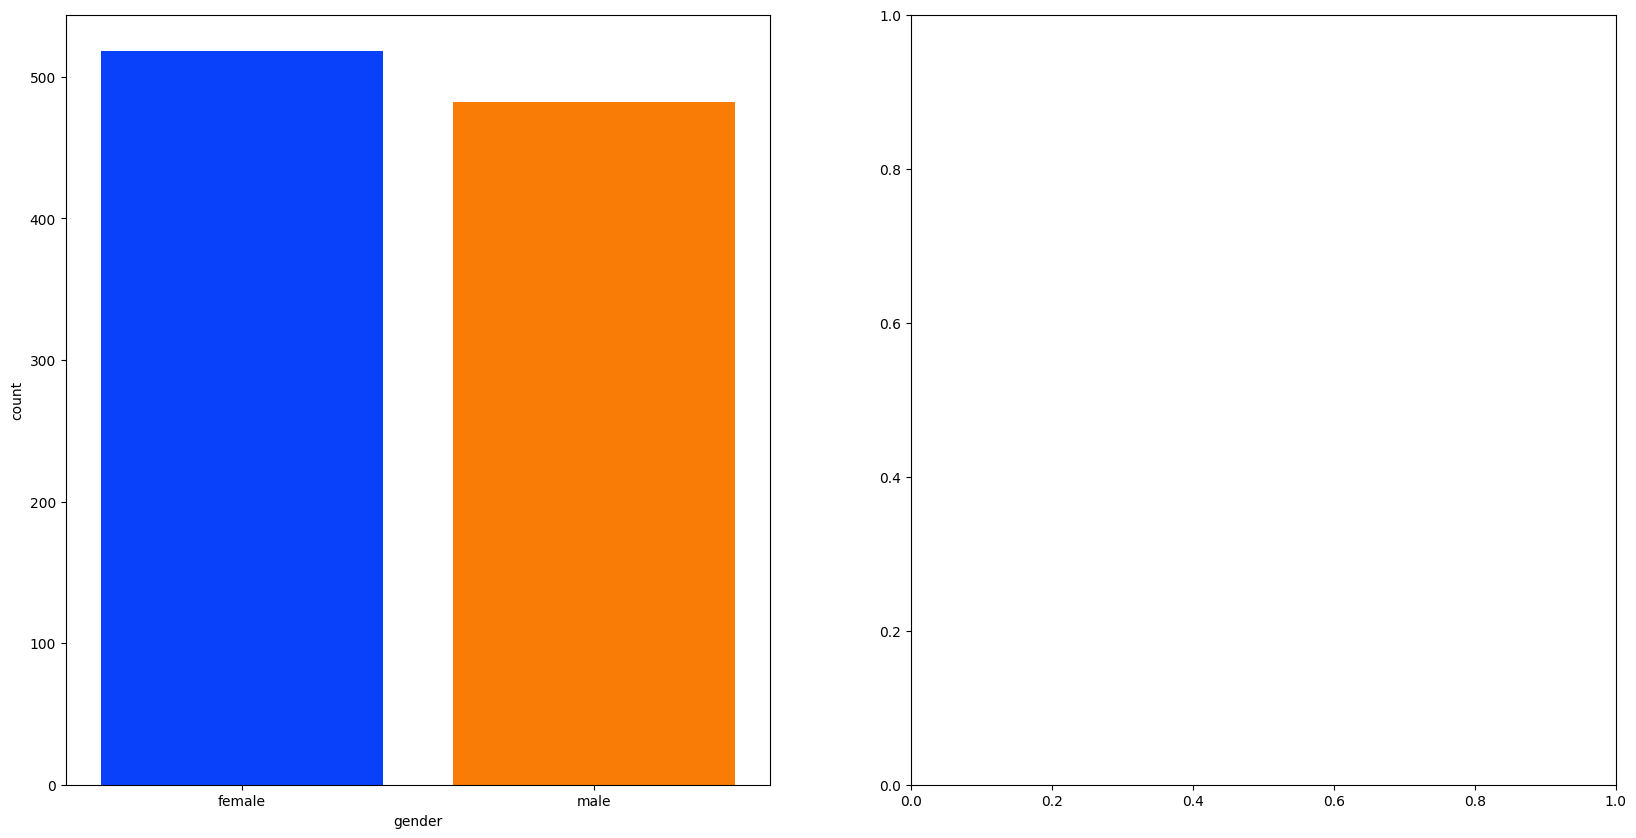

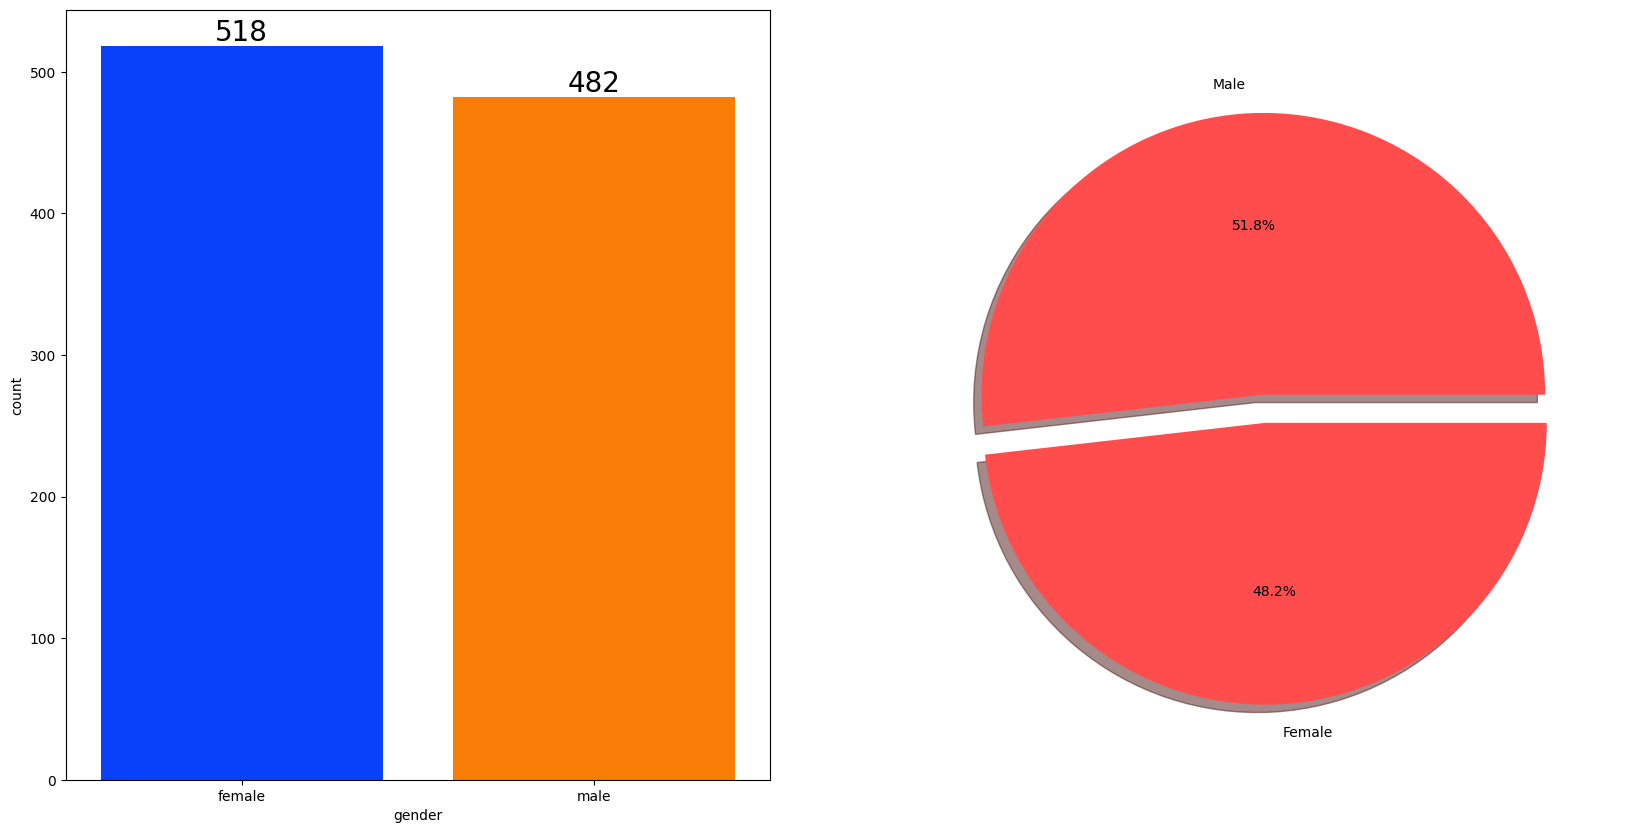

In [53]:
f,ax= plt.subplots(1,2,figsize= (20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct="%1.1f%%", shadow=True,colors=['#ff4d4d'])    
plt.show()

BIVARIATE ANALYSIS ( Does gender have any impact on Student's performance)

In [63]:
#gender_group =df.groupby('gender').mean()
#gender_group

In [64]:
plt.figure(figsize=(10,8))
x= ['Total Average','Math Average']

female_scores = [gender_group['Average'][0],gender_group['math score'][0]]
male_scores= [gender_group['Average'][1],gender_group['math score'][1]]

x_axis= np.arange(len(x))

plt.bar(x_axis - 0.2, male_scores, 0.4, label= 'Male')
plt.bar(x_axis - 0.2, female_scores, 0.4, label= 'Female')

plt.xticks(x_axis,x)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both genders",fontweight='bold')
plt.legend()
plt.show()

TypeError: 'method' object is not subscriptable